# Numerical Cases of RSOME in Python

This document provides the code for numerical case studies presented in the paper *RSOME in Python: An Open-Source Package for Robust Stochastic Optimization Made Easy* and its online supplement. RSOME is an open-source Python package for modeling generic optimization problems in the presence of uncertainty. Resources of RSOME are listed as follows:
- Website: [RSOME in Python](https://xiongpengnus.github.io/rsome/)
- GitHub Repository: [rsome](https://github.com/XiongPengNUS/rsome)
- Paper: [RSOME in Python](http://www.optimization-online.org/DB_HTML/2021/06/8443.html#:~:text=Optimization%20Online%20%2D%20RSOME%20in%20Python,Robust%20Stochastic%20Optimization%20Made%20Easy&text=Abstract%3A%20We%20develop%20a%20Python,and%20distributionally%20robust%20optimization%20problems.)

## Install RSOME and the ECOS Solver
The RSOME package is available on [PyPI](https://pypi.org/project/rsome/) and can be installed using the `pip` command. 

In [1]:
!pip install rsome --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 KB 179.5 kB/s eta 0:00:00a 0:00:01


In this document, we will use the open-source solver [ECOS](https://github.com/embotech/ecos) to solve the the formulated robust models. 

In [2]:
!pip install ecos

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 KB 203.9 kB/s eta 0:00:00a 0:00:01


## Applications in Vehicle Pre-Allocation

### Problem statement

Here, we solve a vehicle pre-allocation problem (which originates from [Hao et al. 2020](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3509026)) to demonstrate the syntax and basic features of RSOME. Consider an urban area with $I$ supply nodes and $J$ demand nodes. The operator, before the random demand $\tilde{\boldsymbol{d}}=(\tilde{d}_j)_{j\in[J]}$ realizes, allocates $x_{ij}$ vehicles from supply node $i\in[I]$ (which has a number $q_i$ of idle vehicles) to demand node $j\in[J]$ at a unit cost $c_{ij}$. After demand realization, the operator collects $\sum_{j\in[J]}r_j\min\left\{\sum_{i\in[I]}x_{ij}d_j\right\}$ revenue. Parameters of the vehicle pre-allocation problem are defined below.

In [1]:
import numpy as np

I = 1                                                 # number of supply nodes
J = 10                                                # number of demand nodes
r = np.array([4.8, 4.692, 3.732, 4.788, 4.656, 
              4.896, 4.836, 4.968, 4.896, 4.584])     # revenue coefficients
c = 3 * np.ones((I, J))                               # cost coefficients 
q = 400 * np.ones(I)                                  # maximum supply of vehicles

The historical data of the random demand $\tilde{\boldsymbol{d}}$ for totally $J=10$ regions, together with the side information, in terms of the precipitation records, are provided by the following dataset.

In [2]:
import pandas as pd
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

url = 'https://xiongpengnus.github.io/rsome/taxi_rain.csv'
data = pd.read_csv(url)
data

,Region1,Region2,Region3,Region4,...,S108_Rain_Amount,S78_Rain_Amount,S79_Rain_Amount,S88_Rain_Amount
0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.1,0.0
1,5.169759,0.000000,2.990986,0.000000,...,0.1,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,...,0.7,0.4,0.4,0.5
...,...,...,...,...,...,...,...,...,...
74,2.649001,6.784071,0.000000,5.542861,...,0.0,0.0,0.0,0.0
75,21.418156,19.711290,26.874735,43.991484,...,15.6,4.6,4.3,4.4
76,0.000000,4.535048,4.168807,0.000000,...,0.0,0.0,0.0,0.0


In [3]:
demand = data.loc[:, 'Region1':'Region10']
demand

,Region1,Region2,Region3,Region4,...,Region7,Region8,Region9,Region10
0,0.000000,0.000000,0.000000,0.000000,...,1.316626,0.770319,0.000000,2.408292
1,5.169759,0.000000,2.990986,0.000000,...,2.702401,4.682649,0.000000,8.641518
2,0.000000,0.000000,0.000000,0.000000,...,6.523627,3.707144,0.000000,3.232930
...,...,...,...,...,...,...,...,...,...
74,2.649001,6.784071,0.000000,5.542861,...,1.713845,0.000000,0.225335,1.851765
75,21.418156,19.711290,26.874735,43.991484,...,12.610632,38.532604,30.980223,18.556275
76,0.000000,4.535048,4.168807,0.000000,...,0.000000,4.535980,7.001034,0.000000


In [4]:
precip = data.loc[:, 'S08_Rain_Amount': 'S88_Rain_Amount']
precip

,S08_Rain_Amount,S107_Rain_Amount,S108_Rain_Amount,S78_Rain_Amount,S79_Rain_Amount,S88_Rain_Amount
0,0.1,0.0,0.0,0.0,0.1,0.0
1,0.0,0.8,0.1,0.0,0.0,0.0
2,0.6,0.6,0.7,0.4,0.4,0.5
...,...,...,...,...,...,...
74,0.0,0.0,0.0,0.0,0.0,0.0
75,1.3,0.3,15.6,4.6,4.3,4.4
76,0.0,0.0,0.0,0.0,0.0,0.0


Notice that in rainy and not rainy days, the demand in each region is quite different, as shown by the figure below.

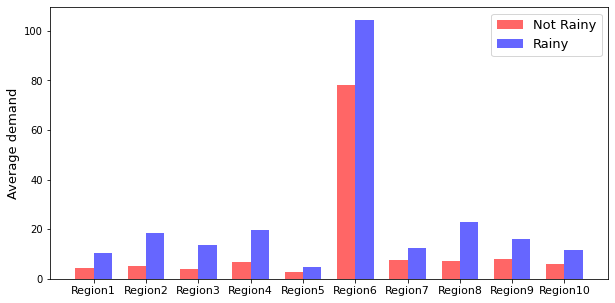

In [5]:
import matplotlib.pyplot as plt

is_rainy = precip.sum(axis=1) > 0
demand_rainy = demand.loc[is_rainy].mean()
demand_not_rainy = demand.loc[~is_rainy].mean()
num_region = len(demand_rainy)

width=0.35
plt.figure(figsize=(10, 5))
plt.bar(np.arange(num_region)-0.5*width, demand_not_rainy, 
        width=width, color='r', alpha=0.6, label='Not Rainy')
plt.bar(np.arange(num_region)+0.5*width, demand_rainy, 
        width=width, color='b', alpha=0.6, label='Rainy')
plt.legend(fontsize=13)
plt.xticks(np.arange(num_region), demand.columns, fontsize=11)
plt.ylabel('Average demand', fontsize=13)
plt.show()

### The Robust Model (Section 2.1 of the Online Supplement)

The robust model is given by

$$
\begin{align}
\min_{\boldsymbol{x}, \boldsymbol{y}}~&\max_{\boldsymbol{d}\in\mathcal{Z}}\left\{\sum_{i\in[I]}\sum_{j\in[J]}(c_{ij}-r_j)x_{ij}+\sum_{j\in[J]}r_jy_j(\boldsymbol{d})
\right\} &&\\
\text{s.t.}~&y_j(\boldsymbol{d}) \geq \sum_{i\in[I]}x_{ij}-d_j && \forall \boldsymbol{d}\in\mathcal{Z}, j\in[J] \\
&y_j(\boldsymbol{d}) \geq 0 && \forall \boldsymbol{d}\in\mathcal{Z}, j\in[J]\\
&y_j \in \mathcal{L}([J]) &&\forall j\in[J]\\
&\sum_{j\in[J]}x_{ij}\leq q_i && \forall i \in [I]\\
&x_{ij} \geq 0 && \forall i \in [I], j\in [J],
\end{align}
$$
where the wait-and-see decision $\boldsymbol{y}$ is approximated by a linear decision rule $\mathcal{L}([J])$, implying that each $y_j$ affinely depends on the demand realization $\boldsymbol{d}$. The uncertainty set $\mathcal{Z}$, expressed as
$$
\mathcal{Z}=\left\{\boldsymbol{d} \left| \underline{\boldsymbol{d}}\leq \boldsymbol{d}\leq \overline{\boldsymbol{d}}\right.\right\},
$$
is a box defined by the lower bound $\underline{\boldsymbol{d}}$ and upper bound $\overline{\boldsymbol{d}}$ of historical demands.

In [6]:
d_ub = demand.max().values                  # upper bound of demand
d_lb = demand.min().values                  # lower bound of demand

The robust model can be then implemented by the following code segment.

In [7]:
from rsome import ro                        # import the ro module
from rsome import eco_solver as eco         # import the Gurobi interface

model = ro.Model()                          # create an RO model

d = model.rvar(J)                           # create an array of random variables
zset = (d <= d_ub, d >= d_lb)               # define a box uncertainty set

x = model.dvar((I, J))                      # define here-and-now decisions as array x
y = model.ldr(J)                            # define linear decision rules as array y
y.adapt(d)                                  # y affinely adapts to d

model.minmax(((c-r)*x).sum() + r@y, zset)   # minimize the worst-case objective 
model.st(y >= x.sum(axis=0) - d, y >= 0)    # robust constraints
model.st(x.sum(axis=1) <= q, x >= 0)        # deterministic constraints

model.solve(eco)                            # solve the model with Gurobi

Being solved by ECOS...
Solution status: Optimal solution found
Running time: 0.0034s


The minimum objective value and the optimal solution can be retrieved using the `get()` method.

In [8]:
model.get()

-75.10768250566842

In [9]:
x1 = x.get()
x1.round(5)

array([[ 0.     ,  0.     ,  0.     ,  0.     ,  0.     , 39.61376,
         0.     ,  0.     ,  0.     ,  0.     ]])

Information on the deterministic counterpart of the robust model as a linear program is presented below.

In [10]:
model.do_math()

Second order cone program object:
Number of variables:          373
Continuous/binaries/integers: 373/0/0
---------------------------------------------
Number of linear constraints: 232
Inequalities/equalities:      211/21
Number of coefficients:       823
---------------------------------------------
Number of SOC constraints:    0

### The Sample Robust Model Using the `ro` Framework (Section 2.2 of the Online Supplement)

The sample robust model presented is a data-driven approach that exploits the historical data of the random demand, denoted by $\left\{\hat{\boldsymbol{d}}_1, \hat{\boldsymbol{d}}_2, ..., \hat{\boldsymbol{d}}_S\right\}$, and are defined as `dhat` in the following code cell.

In [11]:
dhat = demand.values                                    # sample demand as an array
S = dhat.shape[0]                                       # sample size of the dataset

Here, each sample record $\hat{\boldsymbol{d}}_s$ is recognized as a scenario, and an uncertainty set $\mathcal{Z}_s=\left\{\left. \boldsymbol{d} \in [\underline{\boldsymbol{d}}, \overline{\boldsymbol{d}}]~\right|~\|\boldsymbol{d}-\hat{\boldsymbol{d}}_s\|\leq \epsilon\right\}$ is constructed around $\hat{\boldsymbol{d}}_s$ as an $\epsilon$-neighborhood defined by a general norm $\|\cdot\|$, and the robust sample model for the vehicle pre-allocation problem is formulated as below.

$$
\begin{align}
\min_{\boldsymbol{x}, \boldsymbol{y}}~&\max_{\boldsymbol{d}\in\mathcal{Z}}\left\{\sum_{i\in[I]}\sum_{j\in[J]}(c_{ij}-r_j)x_{ij}+\frac{1}{S}\sum_{s=1}^Sa_s
\right\} &&\\
\text{s.t.}~&a_s \geq \sum_{j\in[J]}r_jy_{sj}(\boldsymbol{d}) && \forall \boldsymbol{d}\in\mathcal{Z}_s, s\in[S] \\
&y_{sj}(\boldsymbol{d}) \geq \sum_{i\in[I]}x_{ij}-d_j && \forall \boldsymbol{d}\in\mathcal{Z}_s, s\in[S], j\in[J] \\
&y_{sj}(\boldsymbol{d}) \geq 0 && \forall \boldsymbol{d}\in\mathcal{Z}_s, s\in[S], j\in[J]\\
&y_{sj} \in \mathcal{L}([J]) &&\forall s\in[S], j\in[J]\\
&\sum_{j\in[J]}x_{ij}\leq q_i && \forall i \in [I]\\
&x_{ij} \geq 0 && \forall i \in [I], j\in [J].
\end{align}
$$

In the problem above, $\boldsymbol{a}\in\mathbb{R}^S$ is an intermediate variable representing the worst-case recourse cost in each scenario $s$. The wait-and-see decision $\boldsymbol{y}$ is approximated by a two-dimensional linear decision rule $(y_{sj}(\boldsymbol{y}))_{s\in[S],j\in[J]}$, which implies different decision rule coefficients for different scenarios, thus the name multiple-policy approximation.

Such a sample robust model (assuming a Euclidean norm with the radius to be $\epsilon=0.25$ around each demand record $\hat{\boldsymbol{d}}_s$) is implemented as shown in the following code segment.

In [12]:
from rsome import ro                                    # import the ro module
from rsome import norm                                  # import the norm function
from rsome import eco_solver as eco                     # import the Gurobi interface

epsilon = 0.25                                          # parameter of robustness
model = ro.Model()                                      # create an RO model

d = model.rvar(J)                                       # random variable d
a = model.dvar(S)                                       # variable as the recourse cost
x = model.dvar((I, J))                                  # here-and-now decision x
y = model.ldr((S, J))                                   # linear decision rule y
y.adapt(d)                                              # y affinely adapts to d

model.min(((c-r)*x).sum() + (1/S)*a.sum())              # minimize the objective
for s in range(S):
    zset = (d <= d_ub, d >= d_lb, 
            norm(d - dhat[s]) <= epsilon)               # sample-wise uncertainty set
    model.st((a[s] >= r@y[s]).forall(zset))             # constraints for the sth sample
    model.st((y[s] >= x.sum(axis=0) - d).forall(zset))  # constraints for the sth sample
    model.st((y[s] >= 0).forall(zset))                  # constraints for the sth sample
model.st(x.sum(axis=1) <= q, x >= 0)                    # constraints

model.solve(eco)                                        # solve the model by Gruobi

Being solved by ECOS...
Solution status: Optimal solution found
Running time: 0.9871s


The code cells below provide the optimal objective value and solution.

In [13]:
model.get()

-130.15908159148634

In [14]:
x2 = x.get()
x2.round(5)

array([[ 0.6697 ,  3.00859,  0.     ,  4.34011,  0.     , 70.92135,
         3.99641,  5.18537,  5.82321,  3.82512]])

Because of the Euclidean norm uncertainty set considered for each scenario, the deterministic counterpart is a second-order cone program presented as follows.

In [15]:
model.do_math()

Second order cone program object:
Number of variables:          44132
Continuous/binaries/integers: 44132/0/0
---------------------------------------------
Number of linear constraints: 17789
Inequalities/equalities:      16172/1617
Number of coefficients:       92526
---------------------------------------------
Number of SOC constraints:    1617

### The Sample Robust Model Using the `dro` Framework (Section 2.3 of the Online Supplement)

The sample robust model introduced in the previous section can also be cast as a distributionally robust optimization problem:

$$
\begin{align}
\min_{\boldsymbol{x}, \boldsymbol{y}}~&\sum_{i\in[I]}\sum_{j\in[J]}(c_{ij}-r_j)x_{ij}+\sup_{\mathbb{P}\in\mathcal{F}}\mathbb{E}_{\mathbb{P}}\left[\sum_{j\in[J]}r_jy_j\left(\tilde{s}, \tilde{\boldsymbol{d}}\right)\right] &&\\
\text{s.t.}~&y_{j}(s, \boldsymbol{d}) \geq \sum_{i\in[I]}x_{ij}-d_j && \forall \boldsymbol{d}\in\mathcal{Z}_s,  s\in[S], j\in[J] \\
&y_{j}(s, \boldsymbol{d}) \geq 0 && \forall \boldsymbol{d}\in\mathcal{Z}_s, s\in[S], j\in[J]\\
&y_{j} \in \overline{\mathcal{A}}(\{\{1\}, \{2\}, ..., \{S\}\}, [J]) &&\forall j\in[J]\\
&\sum_{j\in[J]}x_{ij}\leq q_i && \forall i \in [I]\\
&x_{ij} \geq 0 && \forall i \in [I], j\in [J],
\end{align}
$$

where $\tilde{s}$ is a random scalar that corresponds to a demand sample. The ambiguity set $\mathcal{F}$ is written as
$$
\mathcal{F} = \left\{
\mathbb{P}\in\mathcal{P}_0(\mathbb{R}^J\times [S])\left|
\begin{array}{ll}
\left(\tilde{\boldsymbol{d}}, \tilde{s}\right) \sim \mathbb{P} & \\
\mathbb{P}\left[\left.\tilde{\boldsymbol{d}}\in\mathcal{Z}_s\right|\tilde{s}=s \right]=1& \forall s\in[S]\\
\mathbb{P}[\tilde{s}=s]=w_s &\forall s \in[S]
\end{array}
\right.
\right\},
$$
where for each scenario $s$, the weight is $w_s=1/S$ and the corresponding support set $\mathcal{Z}_s=\left\{\left. \boldsymbol{d} \in [\underline{\boldsymbol{d}}, \overline{\boldsymbol{d}}]~\right|~\|\boldsymbol{d}-\hat{\boldsymbol{d}}_s\|\leq \epsilon\right\}$ is an $\epsilon$-neighborhood around the demand sample $\hat{\boldsymbol{d}}_s$. The multiple-policy approximation is equivalent to the event-wise recourse adaptation $\overline{\mathcal{A}}(\{\{1\}, \{2\}, ..., \{S\}\}, [J])$, suggesting that $y_j$ affinely depends on the demand realization and differs around each historical record of demands. Such a distributionally robust optimization model can be implemented by the code segment below.

In [16]:
from rsome import dro                               # import the dro module
from rsome import norm                              # import the norm function
from rsome import E                                 # import the expectation notion
from rsome import eco_solver as eco                 # import the Gurobi interface

epsilon = 0.25                                      # parameter of robustness
w = 1/S                                             # weight of each scenario
model = dro.Model(S)                                # a DRO model with S scenarios

d = model.rvar(J)                                   # random variable d
fset = model.ambiguity()                            # create an ambiguity set
for s in range(S):                                  # for each scenario
    fset[s].suppset(d <= d_ub, d >= d_lb, 
                    norm(d - dhat[s]) <= epsilon)   # define the support set
pr = model.p                                        # an array of scenario weights
fset.probset(pr == w)                               # specify scenario weights

x = model.dvar((I, J))                              # here-and-now decision x
y = model.dvar(J)                                   # wait-and-see decision y
y.adapt(d)                                          # y affinely adapts to d
for s in range(S):
    y.adapt(s)                                      # y adapts to each scenario s

model.minsup(((c-r)*x).sum() + E(r@y), fset)        # the worst-case expectation
model.st(y >= x.sum(axis=0) - d, y >= 0)            # robust constraints
model.st(x.sum(axis=1) <= q, x >= 0)                # deterministic constraints

model.solve(eco)                                    # solve the model by Gruobi

Being solved by ECOS...
Solution status: Optimal solution found
Running time: 1.0422s


The model above gives the same optimal objective and solution as the previous section.

In [17]:
model.get()

-130.15908156563754

In [18]:
x.get().round(5)

array([[ 0.6697 ,  3.00859,  0.     ,  4.34011,  0.     , 70.92135,
         3.99641,  5.18537,  5.82321,  3.82512]])

However, the `dro` framework leads to a different deterministic counterpart shown below.

In [19]:
model.do_math()

Second order cone program object:
Number of variables:          44288
Continuous/binaries/integers: 44288/0/0
---------------------------------------------
Number of linear constraints: 18713
Inequalities/equalities:      17019/1694
Number of coefficients:       95203
---------------------------------------------
Number of SOC constraints:    1617

### The Distributionally Robust Model Considering Side Information (Section 4 of the RSOME in Python Paper)

In this section, we use RSOME to implement the distributionally robust model below proposed by [Hao et al. 2020](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3509026):

$$
\begin{align}
\min_{\boldsymbol{x}, \boldsymbol{y}}~&\sum_{i\in[I]}\sum_{j\in[J]}(c_{ij}-r_j)x_{ij}+\sup_{\mathbb{P}\in\mathcal{F}}\mathbb{E}_{\mathbb{P}}\left[\sum_{j\in[J]}r_jy_j\left(\tilde{s}, \tilde{\boldsymbol{d}}, \tilde{\boldsymbol{u}}\right)\right] &&\\
\text{s.t.}~&y_{j}(s, \boldsymbol{d}, \boldsymbol{u}) \geq \sum_{i\in[I]}x_{ij}-d_j && \forall (\boldsymbol{d}, \boldsymbol{u})\in\mathcal{Z}_s, s\in[S], j\in[J]\\
&y_{j}(s, \boldsymbol{d}, \boldsymbol{u}) \geq 0 && \forall (\boldsymbol{d}, \boldsymbol{u})\in\mathcal{Z}_s, s\in[S], j\in[J]\\
&y_{j} \in \overline{\mathcal{A}}(\{\{1\}, \{2\}, ..., \{S\}\}, [2J]) &&\forall j\in[J]\\
&\sum_{j\in[J]}x_{ij}\leq q_i && \forall i \in [I]\\
&x_{ij} \geq 0 && \forall i \in [I], j\in [J],
\end{align}
$$

where the ambiguity set $\mathcal{F}$ is written as
$$
\mathcal{F} = \left\{
\mathbb{P}\in\mathcal{P}_0(\mathbb{R}^J\times\mathbb{R}^J\times[S])~\left|~
\begin{array}{ll}
\left(\tilde{\boldsymbol{d}}, \tilde{\boldsymbol{u}}, \tilde{s}\right) \sim \mathbb{P} & \\
\mathbb{E}_{\mathbb{P}}[\tilde{\boldsymbol{d}}|\tilde{s}=s] = \boldsymbol{\mu}_s & \forall s\in[S] \\
\mathbb{E}_{\mathbb{P}}[\tilde{\boldsymbol{u}}|\tilde{s}=s] = \boldsymbol{\phi}_s & \forall s\in[S] \\
\mathbb{P}\left[\left.(\tilde{\boldsymbol{d}}, \tilde{\boldsymbol{u}})\in\mathcal{Z}_s\right|\tilde{s}=s \right]=1& \forall s\in[S]\\
\mathbb{P}[\tilde{s}=s]=w_s &\forall s \in[S]
\end{array}
\right.
\right\},
$$

which involves a number of $S$ scenarios, and the weights of scenarios are denoted by the vector $\boldsymbol{w}\in\mathbb{R}^S$. For each scenario $s\in[S]$, the conditional distribution of $\tilde{\boldsymbol{d}}$ is characterized by the conditional mean $\boldsymbol{\mu}_s$ and variance $\boldsymbol{\phi}_s$, as well as the lifted support set 

$$
\mathcal{Z}_s = \left\{(\boldsymbol{d}, \boldsymbol{u}) \in \mathbb{R}^J\times\mathbb{R}^J ~\left|~
\begin{array}{ll}
\boldsymbol{d}\in[\underline{\boldsymbol{d}}, \overline{\boldsymbol{d}}] &\\
(d_j - \mu_j)^2 \leq u_j &\forall j \in [J]
\end{array}
\right.
\right\}.
$$

In this document, the scenarios are generated from the historical data of the regional taxi demands (with
noise added for data desensitization) and side information in terms of the rainfall records using decision tree regressor. The code for generating scenarios and calculating parameters is provided as follows.

In [20]:
from sklearn.tree import DecisionTreeRegressor

regr = DecisionTreeRegressor(max_leaf_nodes=4,          # max leaf nodes
                             min_samples_leaf=3)        # min sample size of each leaf
regr.fit(precip, demand)
mu, index, counts = np.unique(regr.predict(precip), 
                              axis=0,
                              return_inverse=True,
                              return_counts=True)       # conditional mean
w = counts/precip.shape[0]                              # scenario weights         
phi = np.array([demand.values[index==i].var(axis=0)
                for i in range(len(counts))])           # conditional variance
d_ub = np.array([demand.values[index==i].max(axis=0)
                for i in range(len(counts))])           # upper bound of each scenario
d_lb = np.array([demand.values[index==i].min(axis=0)
                for i in range(len(counts))])           # lower bound of each scenario

The tree structure is visualized by the code cell below.

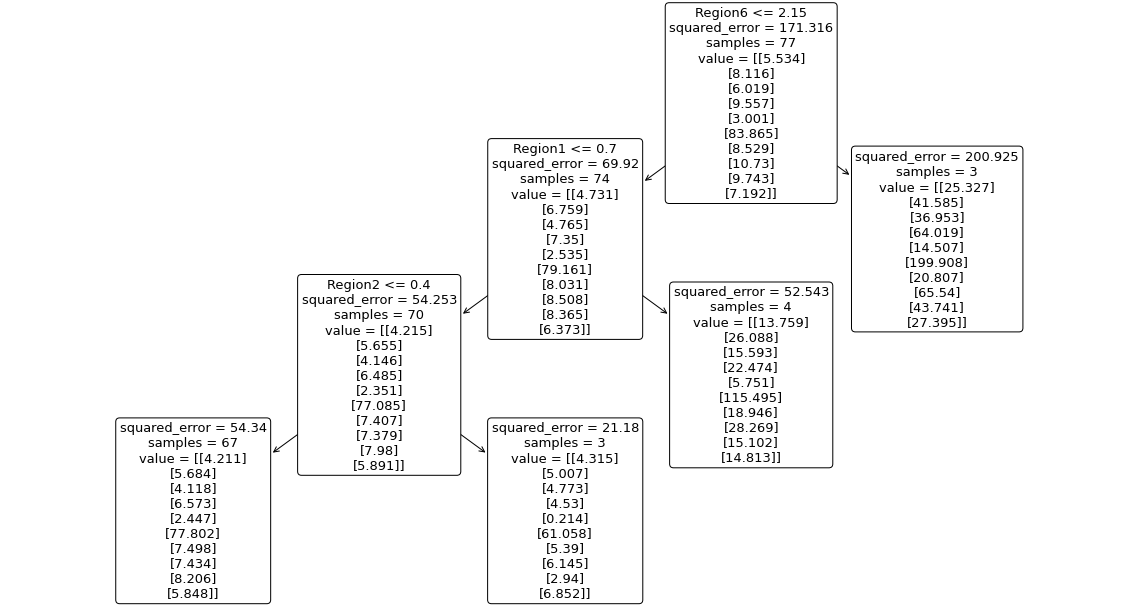

In [21]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(regr, rounded=True, feature_names=demand.columns, fontsize=13)
plt.show()

The distribution of regional demand in each scenario is visualized by the following code segment.

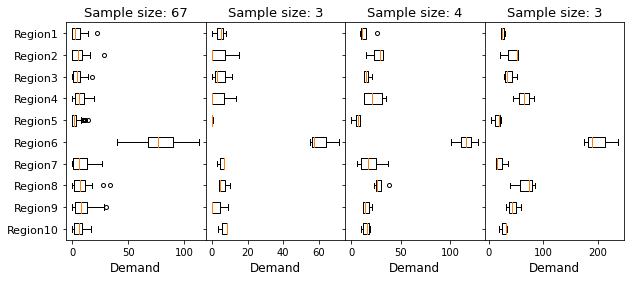

In [22]:
fig = plt.figure(figsize=(10, 4))
gs = fig.add_gridspec(1, 4, hspace=0, wspace=0)
axes = gs.subplots(sharey='row')
for i in range(4):
    each_demand = demand.values[index==i]
    axes[i].boxplot(each_demand, 
                    vert=False, flierprops={'markersize': 4})
    axes[i].set_yticks(list(range(1, 11)), 
                       ['Region{0}'.format(i) for i in range(1, 11)], 
                       fontsize=11)
    axes[i].set_xlabel('Demand', fontsize=12)
    axes[i].set_title('Sample size: {0}'.format(each_demand.shape[0]), 
                      fontsize=13)
axes[3].set_ylim(10.5, 0.5)
plt.show()

Based on the ambiguity set $\mathcal{F}$ defined by scenario-wise means and variances, the distributionally robust model is implemented as follows.

In [23]:
from rsome import dro                         # import the dro module
from rsome import square                      # import the element-wise square function
from rsome import E                           # import the notion of expectation
from rsome import eco_solver as eco           # import the Gurobi interface

S = len(w)                                    # number of scenarios
model = dro.Model(S)                          # create a DRO model with S scenarios

d = model.rvar(J)                             # random demand as the variable d
u = model.rvar(J)                             # auxiliary random variable u
fset = model.ambiguity()                      # create an ambiguity set
for s in range(S):                            # for each scenario:
    fset[s].exptset(E(d) == mu[s],            # specify the expectation set of d and u
                    E(u) <= phi[s])
    fset[s].suppset(d >= d_lb[s],             # specify the support of d and u
                    d <= d_ub[s],
                    square(d - mu[s]) <= u)
pr = model.p                                  # an array of scenario probabilities
fset.probset(pr == w)                         # w as scenario weights

x = model.dvar((I, J))                        # here-and-now decision x
y = model.dvar(J)                             # wait-and-see decision y
y.adapt(d)                                    # y affinely adapts to d
y.adapt(u)                                    # y affinely adapts to u
for s in range(S):                            # for each scenario:
    y.adapt(s)                                # affine adaptation of y is different

model.minsup(((c-r)*x).sum() + E(r@y), fset)  # minimize the worst-case objective
model.st(y >= x.sum(axis=0) - d, y >= 0)      # robust constraints
model.st(x >= 0, x.sum(axis=0) <= q)          # deterministic constraints

model.solve(eco)                              # solve the model by Gurobi
status = model.solution.status                # return the solution status
time = model.solution.time                    # return the solution time
objval = model.get()                          # get the optimal objective value
x_sol = x.get()                               # get the optimal solution

Being solved by ECOS...
Solution status: Optimal solution found
Running time: 0.1113s


Similar to previous sections, we can retrieve the optimal objective and solution, as well as the information on the deterministic reformulation of the robust model.

In [24]:
model.get()

-111.33291087625959

In [25]:
x3 = x.get()
x3.round(5)

array([[ 0.     ,  0.     ,  0.     ,  5.51733,  0.     , 74.41608,
         0.     ,  3.70714,  7.03957,  4.79476]])

In [26]:
model.do_math()

Second order cone program object:
Number of variables:          4889
Continuous/binaries/integers: 4889/0/0
---------------------------------------------
Number of linear constraints: 1930
Inequalities/equalities:      502/1428
Number of coefficients:       10759
---------------------------------------------
Number of SOC constraints:    840

### Summary

#### Visualization of allocation decisions

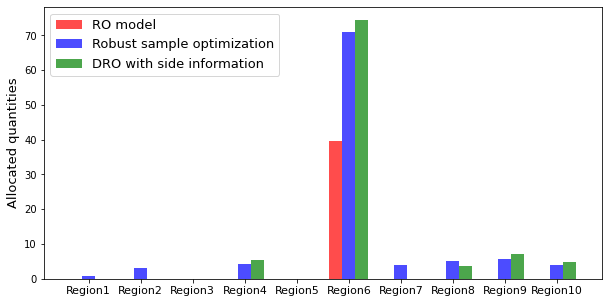

In [27]:
width=0.25
labels = demand.columns

plt.figure(figsize=(10, 5))
plt.bar(np.arange(0, len(labels)) - 1*width, x1.flatten(), 
        width=width, color='r', alpha=0.7, 
        label='RO model')
plt.bar(np.arange(0, len(labels)), x2.flatten(), 
        width=width, color='b', alpha=0.7, 
        label='Robust sample optimization')
plt.bar(np.arange(0, len(labels)) + 1*width, x3.flatten(), 
        width=width, color='g', alpha=0.7,
        label='DRO with side information')
plt.legend(fontsize=13)
plt.xticks(np.arange(0, len(labels)), labels, fontsize=11)
plt.ylabel('Allocated quantities', fontsize=13)
plt.show()

#### Information on the deterministic reformulations

<table>
    <tr style="border-top:2px #555 solid;border-bottom: 1.5px #555 dashed" >
        <td style="text-align:center;padding:10px"><b>Model</b></td>
        <td style="text-align:center;padding:10px">RO with support info.</td>
        <td style="text-align:center;padding:10px">RO with sample info. <br> (the <code>ro</code> framework)</td>
        <td style="text-align:center;padding:10px">RO with sample info. <br> (the <code>dro</code> framework)</td>
        <td style="text-align:center;padding:10px">DRO with side info.</td>
    </tr>
    <tr>
        <td style="text-align:center;padding:10px"><b>Number of variables</b></td>
        <td style="text-align:center;padding:10px">373</td>
        <td style="text-align:center;padding:10px">44132</td>
        <td style="text-align:center;padding:10px">44288</td>
        <td style="text-align:center;padding:10px">4889 </td>
    </tr>
    <tr style="border-top: 1.5px #555 dashed">
        <td style="text-align:center;padding:10px"><b>Number of linear constraints</b></td>
        <td style="text-align:center;padding:10px">232</td>
        <td style="text-align:center;padding:10px">17789</td>
        <td style="text-align:center;padding:10px">18713</td>
        <td style="text-align:center;padding:10px">1930</td>
    </tr>
    <tr>
        <td style="text-align:center;padding:10px"><b>Number of inequalities/equalities</b></td>
        <td style="text-align:center;padding:10px">211/21</td>
        <td style="text-align:center;padding:10px">16172/1617</td>
        <td style="text-align:center;padding:10px">17019/1694</td>
        <td style="text-align:center;padding:10px">502/1428</td>
    </tr>
    <tr>
        <td style="text-align:center;padding:10px"><b>Number of coefficients</b></td>
        <td style="text-align:center;padding:10px">823</td>
        <td style="text-align:center;padding:10px">92526</td>
        <td style="text-align:center;padding:10px">95203</td>
        <td style="text-align:center;padding:10px">10759</td>
    </tr>
    <tr style="border-top: 1.5px #555 dashed;border-bottom:2px #555 solid">
        <td style="text-align:center;padding:10px"><b>Number of SOC constraints</b></td>
        <td style="text-align:center;padding:10px">0</td>
        <td style="text-align:center;padding:10px">1617</td>
        <td style="text-align:center;padding:10px">1617</td>
        <td style="text-align:center;padding:10px">840</td>
    </tr>
</table>
